In [60]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
from scipy.stats.mstats import zscore as ZSCORE

parent=os.path.dirname(os.getcwd())

## SoVI and Cluster Comparison 

Explore the variability of SoVI scores within clusters generated using the SoVI input data.

### Generate Clusters

In [45]:
# read in SoVI inputs
sovi_in=pd.read_csv(os.path.join(parent,'sovi_inputs.csv'))

In [46]:
# sovi variables
sovi_vars=pd.read_csv(os.path.join(parent,'data','SoVI_vars.csv'))

In [47]:
# input variables
invars=sovi_in.columns[sovi_in.columns.isin(sovi_vars.Attribute)]

In [48]:
# generate k means clusterer
km=cluster.KMeans(n_clusters=7)

In [49]:
# z-score sovi inputs
# sovi_in_z=ZSCORE(sovi_in)

# alternative way
# http://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns
sovi_in_z=sovi_in.ix[:,invars]
for col in list(sovi_in_z.columns):
    sovi_in_z[col]=(sovi_in_z[col] - sovi_in_z[col].mean())/sovi_in_z[col].std()

In [51]:
# check
sovi_in_z.head()

,MEDAGE_ACS,BLACK_ACS,QNATAM_ACS,QASIAN_ACS,QHISP_ACS,QAGEDEP_ACS,QPUNIT_ACS,PRENTER_ACS,QNRRES_ACS,QFEMALE_ACS,...,QRICH200K,PERCAP_ALT,QESL_ALT,QED12LES_ALT,QEXTRCT_ALT,QSERV_ALT,QNOAUTO_ALT,MDGRENT_ALT,MHSEVAL_ALT,POPDENS
0,-0.660725,0.626686,-0.196610,-0.136789,-0.444416,-0.934740,0.801174,-0.343664,-1.057903,0.580420,...,-0.115050,0.184526,-0.542333,-0.137532,-0.733176,-0.550441,-0.302353,0.900755,0.071927,-0.096964
1,0.165939,0.026248,-0.161984,-0.163845,-0.299569,0.231916,-0.138353,-0.608287,-0.847040,0.535248,...,0.559766,0.593578,-0.185123,-0.601180,-0.696753,-0.076326,-0.753717,1.104953,0.504300,-0.083444
2,-0.424535,2.554467,-0.223258,-0.372114,-0.250578,-0.494084,0.336965,0.487551,0.014516,-1.545264,...,-0.735613,-1.201658,-0.165709,1.498702,-0.456672,-0.391570,0.760305,-0.491012,-0.535866,-0.132061
3,-0.188346,0.886539,-0.187968,-0.408989,-0.486622,-0.946633,1.727406,-0.930278,-0.669853,-1.414014,...,-0.869368,-1.321000,-0.580038,1.136140,-0.721599,-1.275984,-0.306562,-0.469517,-0.500040,-0.128869
4,-0.247393,-0.525307,-0.207525,-0.385861,-0.015550,-0.273052,0.751412,-0.795502,-0.656920,0.177833,...,-0.642479,-0.523232,0.152987,1.204368,-0.521756,-1.140708,-0.588850,-0.431902,-0.208498,-0.098528


In [52]:
# generate clusters
sovi_clust=km.fit(sovi_in_z)

In [75]:
# read in sovi index values
sovi_usa=pd.read_csv(os.path.join(parent,'data','output','US_Sovi_Score.csv'))

In [76]:
# merge scores and cluster labels to ensure correct order
sovi_clust_df=pd.DataFrame({'Geo_FIPS':sovi_in.Geo_FIPS,'cluster':sovi_clust.labels_})
sovi_scores_clust=sovi_usa.merge(sovi_clust_df,on='Geo_FIPS')

In [77]:
sovi_scores_clust.head()

,Geo_FIPS,sovi,rank,cluster
0,g01001,-3.377904,578.0,1
1,g01003,-1.181056,1900.0,1
2,g01005,-0.024258,3124.0,0
3,g01007,-4.418068,326.0,5
4,g01009,-1.918606,1303.0,5


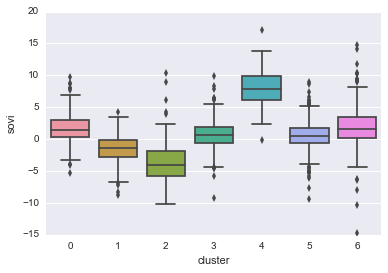

In [78]:
sns.boxplot(x="cluster",y="sovi",data=sovi_scores_clust)